# Quantifying Shakespeare

In this notebook we will:

1. Read all of shakespeare's work into a list of strings
2. Count the frequencies of letters used
3. Visualize the results of the frequencies

The dataset we will use is: <https://bit.ly/shakespeare-txt>

In [9]:
# Read the lines into a list

from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read every line from filename into a list."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        line = line.lower()
        line = line.strip()
        lines.append(line)
    file_handle.close()
    return lines


shakespeare_lines: list[str] = read_lines("./shakespeare.txt")
# print(shakespeare_lines)

In [10]:
# Tally up characters

def tally(counts: dict[str, int], key: str) -> None:
    if key in counts:  # Use in key for dicts, not lists
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[int]) -> dict[str, int]:
    """Count the frequencies of all letters in lines."""
    counts: dict[str, int] = {}
    for line in lines:
            for char in line:
                if char >= "a" and char <= "z":
                    tally(counts, char)
                # if char.isalpha():  -> Another way to do this
                    # tally(counts, char)    
    return counts

shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, 'e': 447204, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, 'a': 289150, 'w': 89390, 'm': 111452, 'k': 35408, 'v': 37569, 'z': 1631, 'q': 3582}


In [15]:
# Sorting alphabetically

items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)
shakespeare_letters_sorted: dict[str, int] = dict(items_in_dict)
print(shakespeare_letters_sorted)

{'a': 289150, 'b': 61956, 'c': 88185, 'd': 149462, 'e': 447204, 'f': 80516, 'g': 68199, 'h': 236868, 'i': 253990, 'j': 4779, 'k': 35408, 'l': 170019, 'm': 111452, 'n': 243262, 'o': 314600, 'p': 58464, 'q': 3582, 'r': 237864, 's': 248989, 't': 329775, 'u': 128947, 'v': 37569, 'w': 89390, 'x': 5294, 'y': 94370, 'z': 1631}


<BarContainer object of 26 artists>

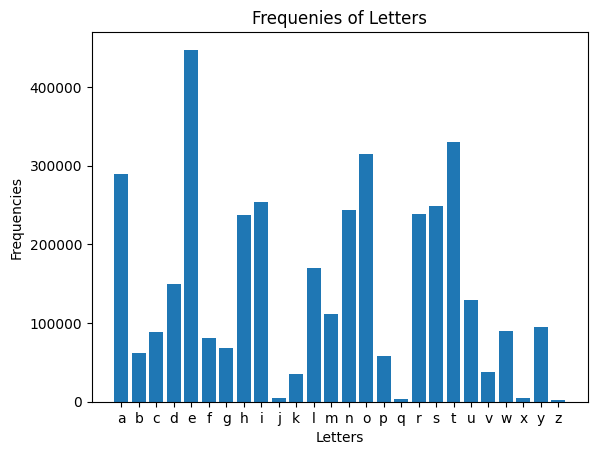

In [16]:
# Make a bar chart

from matplotlib import pyplot

pyplot.title("Frequenies of Letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(shakespeare_letters_sorted.keys())
values: list[int] = list(shakespeare_letters_sorted.values())
pyplot.bar(labels, values)
